# Unsupervised Learning Presentation

# Imports : 

In [300]:
from sklearn.cluster import KMeans, AgglomerativeClustering, Birch, SpectralClustering, DBSCAN
from sklearn.decomposition import PCA, MiniBatchDictionaryLearning, DictionaryLearning, NMF, FastICA, FactorAnalysis, LatentDirichletAllocation
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
np.random.seed(0)

# Open Unlabelled file : 

In [301]:
features_unsupervised = pd.read_csv("features_unsupervised.csv", sep=";")

# Unsupervised Feature Selection

First, we are going to look at the features that have the lowest variance. We will then remove these features from the dataset.

original features shape:
(1000, 66)


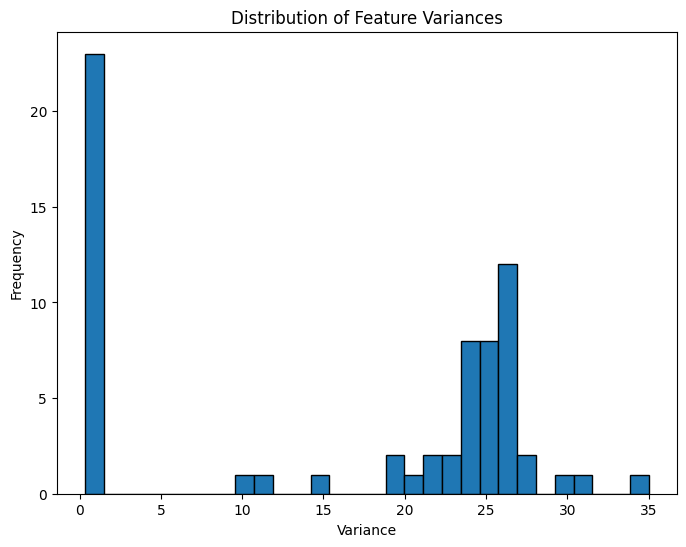

In [302]:
# Print the shape of the original features
print('original features shape:')
print(features_unsupervised.shape)

# Set the threshold for variance
thr = 0 

# Create a VarianceThreshold object with the specified threshold
selector = VarianceThreshold(threshold=thr)

# Apply the VarianceThreshold transformation to the features
features_unsupervised_new = selector.fit_transform(features_unsupervised)

# Get the variances of the selected features
variances = selector.variances_

# Plot the distribution of feature variances
plt.figure(figsize=(8, 6))
plt.hist(variances, bins=30, edgecolor='black')
plt.title('Distribution of Feature Variances')
plt.xlabel('Variance')
plt.ylabel('Frequency')
plt.show()


We could think that the features with the lowest variance on this chart are to be removed. However, we did not take into account the fact that the features are not scaled. 

Let's do this now : 

## Normalization of features

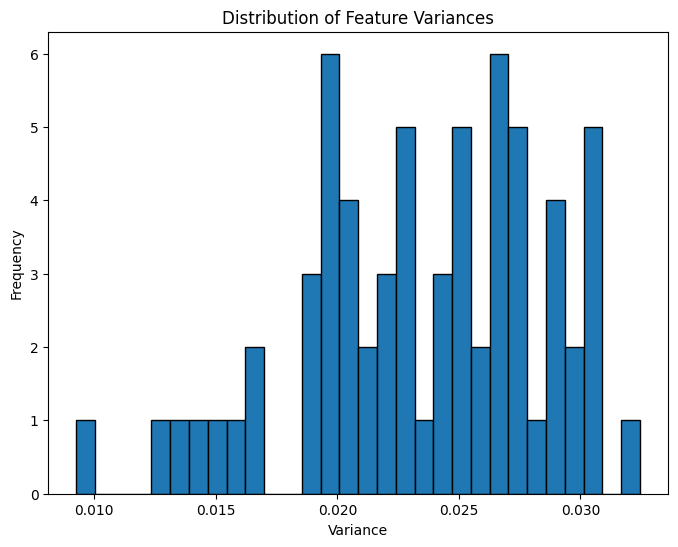

In [303]:
# Import the MinMaxScaler and VarianceThreshold from sklearn.preprocessing and sklearn.feature_selection respectively
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import VarianceThreshold

def normalize_df(df):
    # Initialize the MinMaxScaler, which will transform features by scaling each feature to a given range (default is [0, 1])
    scaler = MinMaxScaler()

    # Fit the scaler to the features_unsupervised DataFrame and transform the data. The result is a normalized version of the original DataFrame
    features_unsupervised_normalized = scaler.fit_transform(df)

    # Reconstruct the DataFrame with the normalized values, maintaining the original column names and index
    features_unsupervised_normalized_df = pd.DataFrame(features_unsupervised_normalized, columns=df.columns, index=df.index)
    return features_unsupervised_normalized_df

# Reconstruct the DataFrame with the normalized values, maintaining the original column names and index
features_unsupervised_normalized_df = normalize_df(features_unsupervised)

# Set the variance threshold. Features with a variance lower than this threshold will be removed.
thr = 0

# Initialize the VarianceThreshold object with the defined threshold
selector = VarianceThreshold(threshold=thr)

# Fit the selector to the normalized DataFrame and transform the data. The result is a new DataFrame where features with variances lower than the threshold have been removed
features_unsupervised_normalized_new = selector.fit_transform(features_unsupervised_normalized_df)

# Get the variances of the features
variances = selector.variances_

# Plot a histogram of the variances
plt.figure(figsize=(8, 6))
plt.hist(variances, bins=30, edgecolor='black')
plt.title('Distribution of Feature Variances')
plt.xlabel('Variance')
plt.ylabel('Frequency')
plt.show()

Now that we have normalized the features, we can look at the variance of the features again and remove the features with the lowest variance : 

In [304]:
def remove_features_with_low_variance(df, thr):
    # Initialize VarianceThreshold with the calculated threshold
    selector = VarianceThreshold(threshold=thresh_perc)

    # Fit the selector to the normalized DataFrame and transform the data. The result is a new DataFrame where features with variances lower than the threshold have been removed
    reduced = selector.fit_transform(df)

    # Get the selected features mask, which is a boolean array indicating whether a feature has been selected (True) or not (False)
    selected_features_mask = selector.get_support()

    # Get the selected columns using the selected features mask
    selected_columns = df.columns[selected_features_mask]

    # Reconstruct DataFrame with selected features
    reduced_df = pd.DataFrame(reduced, columns=selected_columns, index=df.index)

    return reduced_df

# Find the threshold to remove the given percentage of features with the lowest variance
perc_toremove = 5
thresh_perc = np.percentile(variances, perc_toremove)
print("Threshold to remove {}% of features: {}".format(perc_toremove, thresh_perc))

# Reconstruct DataFrame with selected features
features_unsupervised_normalized_reduced_df = remove_features_with_low_variance(features_unsupervised_normalized_df, thresh_perc)

# Print the shape of the original features DataFrame
print('Original features shape:')
print(features_unsupervised_normalized_df.shape)

# Print the shape of the selected features DataFrame
print('Selected features shape:')
print(features_unsupervised_normalized_reduced_df.shape)


Threshold to remove 5% of features: 0.014378393647693452
Original features shape:
(1000, 66)
Selected features shape:
(1000, 62)


In [305]:
def get_list_of_deleted_features(df, reduced_df):
    original_features = df.columns.tolist()
    reduced_features = reduced_df.columns.tolist()
    removed_features_list = [feature for feature in original_features if feature not in reduced_features]
    return removed_features_list

# Get the list of removed features
removed_features_list = get_list_of_deleted_features(features_unsupervised_normalized_df, features_unsupervised_normalized_reduced_df)

# Print the number of removed features and their names
print(f"{len(removed_features_list)} features were removed:")
for feature_name in removed_features_list:
    print(feature_name)

# Print the features with variances greater than the threshold
print(f"\nFeatures with variance greater than {thr} threshold:")
for feature_name in features_unsupervised_normalized_reduced_df.columns:
        print(f"{feature_name}")


4 features were removed:
 distance(rat, cheese_0)
 distance(rat, cheese_1)
 distance(python, cheese_17)
 distance(python, cheese_20)

Features with variance greater than 0 threshold:
 density(rat)
 density(python)
 distance(rat, python)
 density(cheese_0)
 distance(python, cheese_0)
 density(cheese_1)
 distance(python, cheese_1)
 density(cheese_2)
 distance(rat, cheese_2)
 distance(python, cheese_2)
 density(cheese_3)
 distance(rat, cheese_3)
 distance(python, cheese_3)
 density(cheese_4)
 distance(rat, cheese_4)
 distance(python, cheese_4)
 density(cheese_5)
 distance(rat, cheese_5)
 distance(python, cheese_5)
 density(cheese_6)
 distance(rat, cheese_6)
 distance(python, cheese_6)
 density(cheese_7)
 distance(rat, cheese_7)
 distance(python, cheese_7)
 density(cheese_8)
 distance(rat, cheese_8)
 distance(python, cheese_8)
 density(cheese_9)
 distance(rat, cheese_9)
 distance(python, cheese_9)
 density(cheese_10)
 distance(rat, cheese_10)
 distance(python, cheese_10)
 density(cheese_11

# Manual feature selection and feature engineering

In addition to the removal of this features, we will get rid of the distance(rat, python) feature which does not have any major influence on the result of the games 

In [306]:
features_unsupervised_normalized_reduced_df = features_unsupervised_normalized_reduced_df.drop(columns=[' distance(rat, python)'])

# Print original features shape
print('Original features shape:')
print(features_unsupervised_normalized_df.shape)

# Print selected features shape
print('Selected features shape:')
print(features_unsupervised_normalized_reduced_df.shape)


Original features shape:
(1000, 66)
Selected features shape:
(1000, 61)


Now, we will do some feature engineering. We will create some new features : 
- sum of distances between python and half plus one of the closest cheeses (The less it is, the closest half of the cheeses are to the python even though a greedy algorithm would not go back to the initial position after eating a cheese. But it is a second indicator related to the density of the cheeses)
- sum of distances between rat and half plus one of the closest cheeses (The less it is, the closest half of the cheeses are to the rat even though a greedy algorithm would not go back to the initial position after eating a cheese. But it is a second indicator related to the density of the cheeses)
- distance between rat and cheese with the highest density (can be a good indicator for the winner. Cause if the rat does not have the best density but is closest to the cheese with the best density, it can win)
- distance between python and cheese with the highest density (can be a good indicator for the winner. Cause if the python does not have the best density but is closest to the cheese with the best density, it can win)

In [307]:
# Get the names of the previously removed features 
removed_features_names = get_list_of_deleted_features(features_unsupervised, features_unsupervised_normalized_reduced_df) 
print(removed_features_names)

features_unsupervised_new = features_unsupervised.copy()
# Define the number of cheeses
n_cheeses = 21

# Calculate the sum of distances between python and half plus one of the closest cheeses
distances_python_cheeses = features_unsupervised_new.filter(regex='distance\(python, cheese_\d+\)').values
half_plus_one = (n_cheeses + 1) // 2
closest_distances_python = np.partition(distances_python_cheeses, half_plus_one, axis=1)[:, :half_plus_one]
features_unsupervised_new['python_closest_cheeses_sum'] = np.sum(closest_distances_python, axis=1)

# Calculate the sum of distances between rat and half plus one of the closest cheeses
distances_rat_cheeses = features_unsupervised_new.filter(regex='distance\(rat, cheese_\d+\)').values
closest_distances_rat = np.partition(distances_rat_cheeses, half_plus_one, axis=1)[:, :half_plus_one]
features_unsupervised_new['rat_closest_cheeses_sum'] = np.sum(closest_distances_rat, axis=1)

# Calculate the distance between rat and cheese with the highest density
cheese_densities = features_unsupervised_new.filter(regex='density\(cheese_\d+\)').values
cheese_distances_rat = features_unsupervised_new.filter(regex='distance\(rat, cheese_\d+\)').values
max_cheese_density_idx = np.argmax(cheese_densities, axis=1)
features_unsupervised_new['rat_distance_to_max_density_cheese'] = cheese_distances_rat[np.arange(len(max_cheese_density_idx)), max_cheese_density_idx]

# Calculate the distance between python and cheese with the highest density
cheese_distances_python = features_unsupervised_new.filter(regex='distance\(python, cheese_\d+\)').values
features_unsupervised_new['python_distance_to_max_density_cheese'] = cheese_distances_python[np.arange(len(max_cheese_density_idx)), max_cheese_density_idx]

# Remove the previously removed features from the DataFrame 
features_unsupervised_reduced = features_unsupervised_new.drop(columns=removed_features_names)

# Normalize the features
features_unsupervised_reduced_normalized = normalize_df(features_unsupervised_reduced)

[' distance(rat, python)', ' distance(rat, cheese_0)', ' distance(rat, cheese_1)', ' distance(python, cheese_17)', ' distance(python, cheese_20)']


Calculating Inertia:   0%|          | 0/40 [00:00<?, ?it/s]c:\Users\grego\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
Calculating Inertia:   2%|▎         | 1/40 [00:00<00:18,  2.10it/s]c:\Users\grego\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
Calculating Inertia:   5%|▌         | 2/40 [00:00<00:18,  2.02it/s]c:\Users\grego\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, d

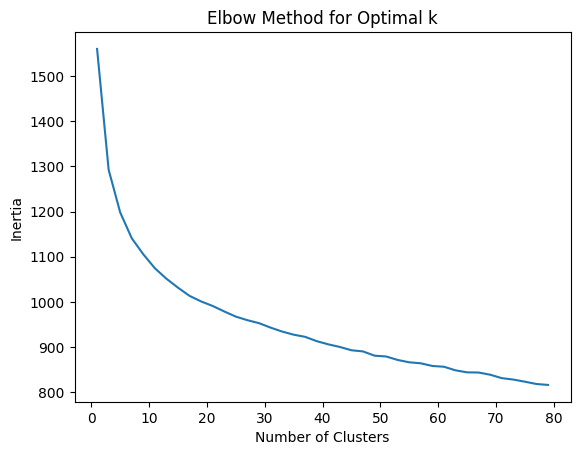

In [308]:
# Initialize an empty list to store inertias
inertias = []

# Define a range of values for n_clusters (number of clusters)
n_clusters = np.arange(1, 80, 2)

import tqdm

# Iterate through the range of n_clusters with tqdm for progress bar
for i in tqdm.tqdm(n_clusters, desc="Calculating Inertia"):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(features_unsupervised_reduced_normalized)
    inertias.append(kmeans.inertia_)

# Plot the inertia values against the number of clusters
plt.plot(n_clusters, inertias)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

Looking at the result of the elbow, we can see that 20 clusters seem to be a good number of clusters.

In [309]:
# You can choose a number based on your Elbow Method plot
n_clusters = 2  # for example

# Initialize the KMeans model
kmeans = KMeans(n_clusters=n_clusters, random_state=0)

# Fit the model to your DataFrame
kmeans.fit(features_unsupervised_reduced_normalized)

# Get the predicted cluster labels
labels = kmeans.labels_

# Add a new column to your DataFrame with the predicted labels
features_unsupervised_reduced_normalized['cluster'] = labels

c:\Users\grego\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


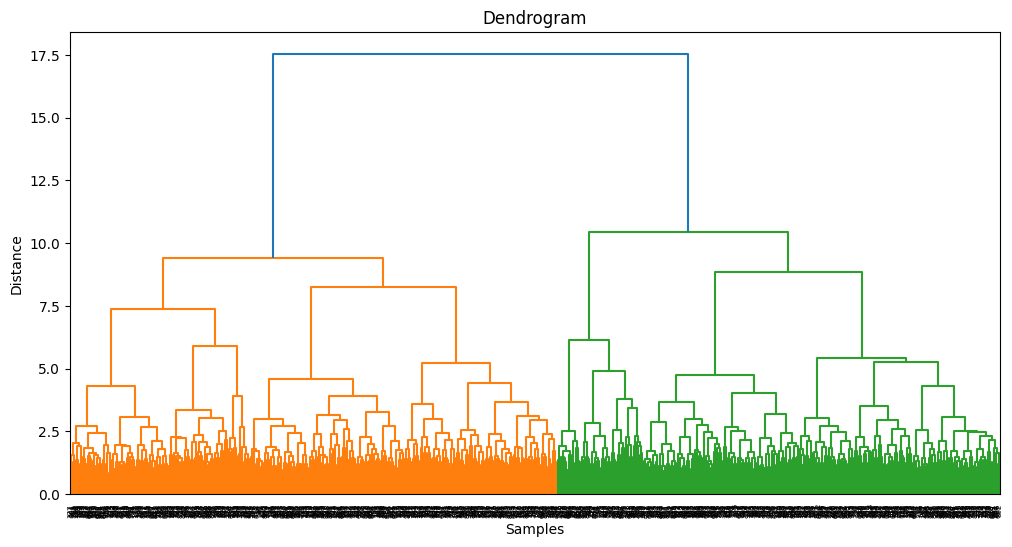

In [310]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Calculate the linkage matrix
Z = linkage(features_unsupervised_reduced_normalized.drop(columns='cluster'), 'ward')

# Plot the dendrogram
plt.figure(figsize=(12, 6))
dendrogram(Z)
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

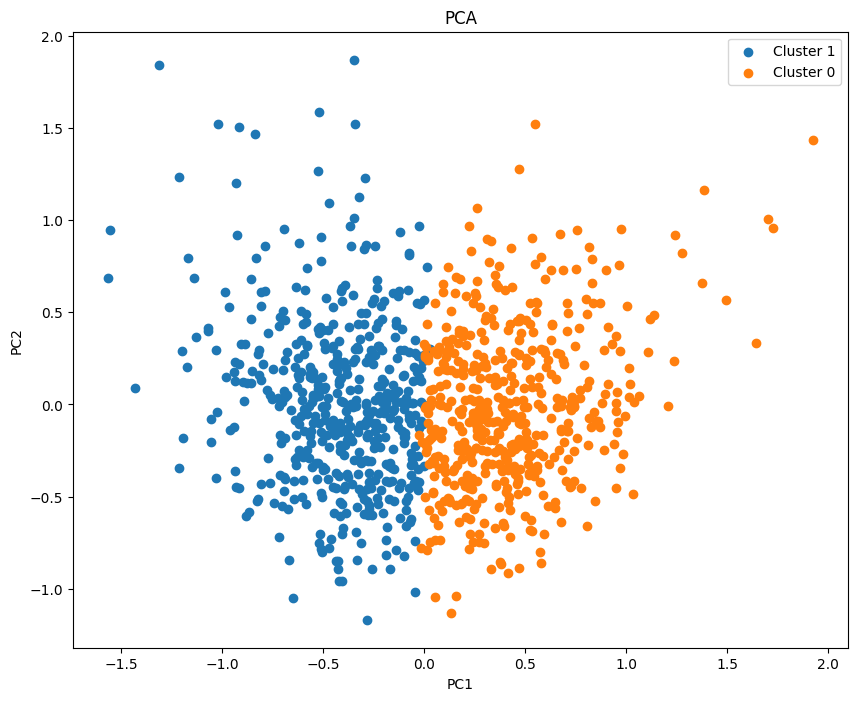

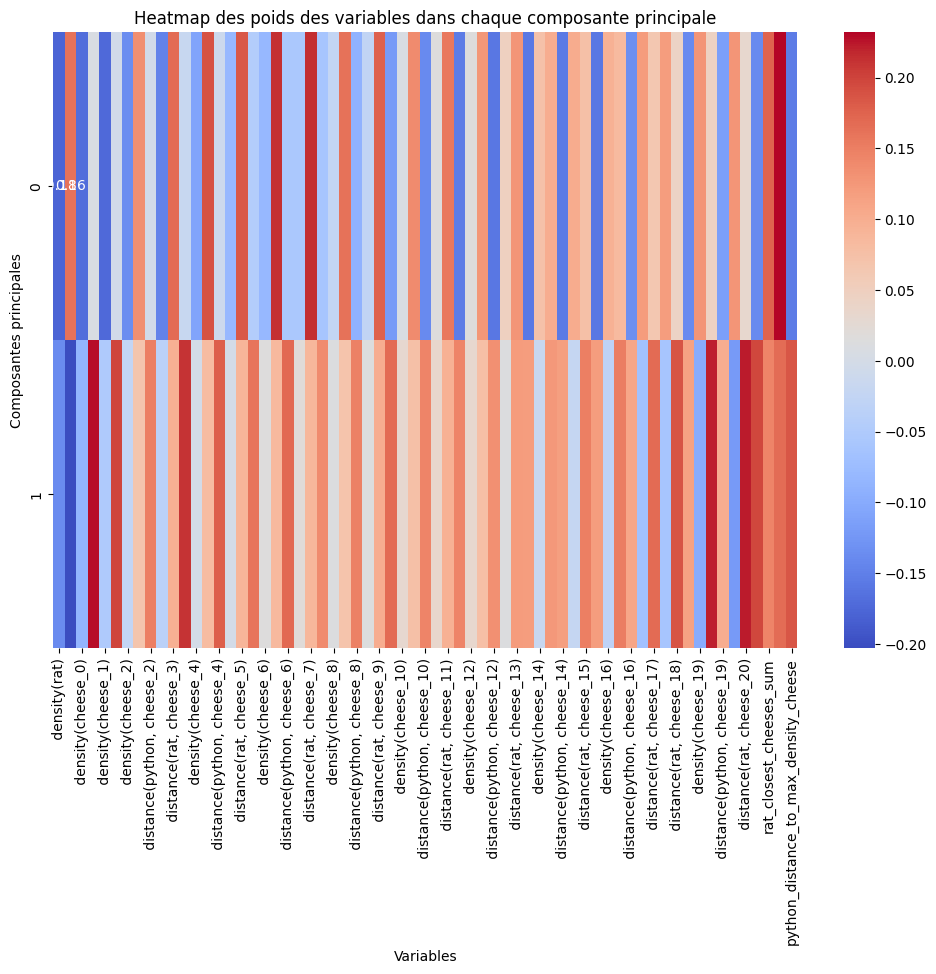

In [311]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Charger les données
# Supposons que features_unsupervised_normalized_reduced_df est déjà disponible

# Appliquer la PCA
pca = PCA(n_components=2)  # Spécifiez le nombre de composantes principales souhaitées
X_pca = pca.fit_transform(features_unsupervised_reduced_normalized.drop(columns='cluster'))

# Créer un DataFrame pour les composantes principales
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])

# Récupérer les informations sur les clusters
clusters = features_unsupervised_reduced_normalized['cluster']

# Visualisation des données dans l'espace PCA
plt.figure(figsize=(10, 8))

# Colorer les points en fonction des clusters
unique_clusters = clusters.unique()
for cluster in unique_clusters:
    cluster_data = pca_df[clusters == cluster]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'], label=f'Cluster {cluster}')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA')
plt.legend()
plt.show()
import seaborn as sns

components = pca.components_

# Créer un DataFrame pour les composantes principales et les noms des variables d'origine
components_df = pd.DataFrame(components, columns=features_unsupervised_reduced_normalized.drop(columns='cluster').columns)

# Afficher une heatmap des poids des variables dans chaque composante principale
plt.figure(figsize=(12, 8))
sns.heatmap(components_df, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap des poids des variables dans chaque composante principale')
plt.xlabel('Variables')
plt.ylabel('Composantes principales')
plt.show()

dendograme 
elbow
cluster images